# Python para Economistas - Clase 3

**Plan de clase:**  
**(1)** GitHub para entregar tarea \
**(2)** Repaso de `Pandas` \
**(3)** `Pandas`: temas nuevos \
**(4)** `Matplotlib` \
**(5)** Ejercicios

___
## (1) GitHub

A partir de esta clase, **los trabajos prácticos se entregarán a través de GitHub** (ya no a través de Slack).\
Supondremos que ya tienen una cuenta personal de GitHub. Vamos a ver:


 **(a)** Cómo crear un repo privado: https://docs.github.com/en/get-started/quickstart/create-a-repo  
 **(b)** Cómo agregar colaboradores: https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository  
 **(c)** Clonar repo en computadora  
 **(d)** Comandos nuevos: `status`, `add`, `commit` y `push`  
 
 _Sólo si es necesario: https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token_

Los nombres de usuario de GitHub de los profesores están en el notebook correspondiente al trabajo práctico.

___

**_Recordatorio:_**
Como siempre, para seguir esta clase, pueden ejecutar `git pull` para bajarse este notebook. Recuerden guardar los cambios en los archivos del repositorio que hayan modificado (y que quieran preservar) con "Save as...", luego ejecutar `git reset --hard` para volver los archivos al estado original y así evitar conflictos al hacer el pull.

___
## (2) Repaso de Pandas
Vamos a trabajar sobre un archivo CSV que contiene una serie temporal con la potencia de distintas centrales eléctricas de Argentina.

- abrir archivos
- inspeccionar los datos
- crear columnas
- seleccionar y dropear columnas
- seleccionar segmentos de una base (filtrar, slice, loc)

**(a)** cargar los datos en el archivo `potencia_instalada_mod.csv`. (_Nota: van a tener que definir el parámetro_ `encoding='latin1'`_)_  
**(b)** identificar cuántas columnas y filas hay, cantidades según tipo de dato y si alguna tiene valores faltantes.  
**(c)** inspeccionemos las primeras 5 líneas: ¿qué problema ven?  
**(d)** armar un dataframe llamado `df` que tenga las siguientes columnas: periodo, el agente, la descripcion del agente, la fuente de generación y la potencia instalada.  
**(e)** redondear la columna de potencia instalada al entero más cercano  
**(f)** cambiar el formato de la columna de potencia instalada a `int`. \
**(g)** cortar la base para quedarnos únicamente con las primeras 11497 filas

In [3]:
import pandas as pd

In [4]:
potencia_df = pd.read_csv("potencia_instalada_mod.csv", encoding='latin1', sep="|", index_col="Unnamed: 0")

In [5]:
potencia_df.shape

(15793, 15)

In [6]:
potencia_df.dtypes
potencia_df.info(verbose=True)
potencia_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 0 to 15792
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15793 non-null  int64  
 1   periodo                15793 non-null  object 
 2   central                15793 non-null  object 
 3   agente                 15789 non-null  object 
 4   agente_descripcion     15789 non-null  object 
 5   region                 15793 non-null  object 
 6   categoria_region       15793 non-null  object 
 7   tipo_maquina           15793 non-null  object 
 8   fuente_generacion      15793 non-null  object 
 9   tecnologia             15793 non-null  object 
 10  potencia_instalada_mw  15793 non-null  float64
 11  fecha_proceso          15793 non-null  object 
 12  lote_id_log            15793 non-null  int64  
 13  mes                    15793 non-null  int64  
 14  indice_tiempo          15793 non-null  object 
dtypes:

,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo
Unnamed: 0,,,,,,,,,,,,,,,
0,2,01/10/2015 0:00,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,47:17.9,4,10,2015-10
1,3,01/10/2015 0:00,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,47:17.9,4,10,2015-10
2,4,01/10/2015 0:00,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,47:17.9,4,10,2015-10
3,5,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,47:17.9,4,10,2015-10
4,6,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,47:17.9,4,10,2015-10


In [7]:
# potencia_df = potencia_df.drop("Unnamed: 0", axis=1).head(5)

In [8]:
potencia_df.index.name = "indice"

In [9]:
potencia_df

,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo
indice,,,,,,,,,,,,,,,
0,2,01/10/2015 0:00,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,47:17.9,4,10,2015-10
1,3,01/10/2015 0:00,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,47:17.9,4,10,2015-10
2,4,01/10/2015 0:00,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,47:17.9,4,10,2015-10
3,5,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,47:17.9,4,10,2015-10
4,6,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,47:17.9,4,10,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15788,16810,01/02/2020 0:00,LOM2EO,PELOMA2G,P.EOLICO LOMA BLANCA 2,PATAGONICA,Patagonia,EO,Renovable,Eólica,51.20,06:12.2,67,2,2020-02
15789,16811,01/02/2020 0:00,ENE1EO,PEENER2G,P.EOLICO LA ENERGETICA Renov2,BUENOS AIRES,Gba - Litoral - Buenos Aires,EO,Renovable,Eólica,79.80,06:12.2,67,2,2020-02
15790,16812,01/02/2020 0:00,SANDFV,PFSOLAAG,PQUE FOTOV.SOLAR DE LOS ANDES,CUYO,Cuyo,FV,Renovable,Solar,5.00,06:12.2,67,2,2020-02


In [10]:
columnas_deseadas = ["periodo", "agente", "agente_descripcion", "fuente_generacion", "potencia_instalada_mw"]

In [112]:
potencia_df

,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo
indice,,,,,,,,,,,,,,,
0,2,01/10/2015 0:00,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,47:17.9,4,10,2015-10
1,3,01/10/2015 0:00,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,47:17.9,4,10,2015-10
2,4,01/10/2015 0:00,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,47:17.9,4,10,2015-10
3,5,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,47:17.9,4,10,2015-10
4,6,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,47:17.9,4,10,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15788,16810,01/02/2020 0:00,LOM2EO,PELOMA2G,P.EOLICO LOMA BLANCA 2,PATAGONICA,Patagonia,EO,Renovable,Eólica,51.20,06:12.2,67,2,2020-02
15789,16811,01/02/2020 0:00,ENE1EO,PEENER2G,P.EOLICO LA ENERGETICA Renov2,BUENOS AIRES,Gba - Litoral - Buenos Aires,EO,Renovable,Eólica,79.80,06:12.2,67,2,2020-02
15790,16812,01/02/2020 0:00,SANDFV,PFSOLAAG,PQUE FOTOV.SOLAR DE LOS ANDES,CUYO,Cuyo,FV,Renovable,Solar,5.00,06:12.2,67,2,2020-02


In [11]:
df = potencia_df[columnas_deseadas]

In [12]:
df.head()

,periodo,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,,
0,01/10/2015 0:00,CTBROWNG,C.T. ALMIRANTE BROWN,Térmica,25.00
1,01/10/2015 0:00,CAPEXSAG,C.T. AGUA DEL CAJON,Térmica,184.40
2,01/10/2015 0:00,HIDIAMAG,H. DIAMANTE SA,Hidráulica,150.00
3,01/10/2015 0:00,CTAESPAG,C.T. AES PARANA,Térmica,525.96
4,01/10/2015 0:00,CTAESPAG,C.T. AES PARANA,Térmica,319.30


In [13]:
df.potencia_instalada_mw = round(df["potencia_instalada_mw"])

/tmp/ipykernel_26009/3867108667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.potencia_instalada_mw = round(df["potencia_instalada_mw"])


In [14]:
df.potencia_instalada_mw = df.potencia_instalada_mw.astype(int)

/tmp/ipykernel_26009/3647397309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.potencia_instalada_mw = df.potencia_instalada_mw.astype(int)


In [15]:
df.potencia_instalada_mw.dtype

dtype('int64')

In [16]:
df.loc[:11496]
df.iloc[:11497]
df = df.head(11497)

In [17]:
df.tail()

,periodo,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,,
11492,01/04/2019 0:00,CTENSENG,BIOGAS RS CT ENSENADA SECCO,Renovable,5
11493,01/04/2019 0:00,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,Renovable,6
11494,01/04/2019 0:00,PSTINO2G,PQUE SOLAR TINOGASTA II,Renovable,7
11495,01/04/2019 0:00,PEBICE2G,P.EOLICO BICENTENARIO 2,Renovable,25
11496,01/04/2019 0:00,PEBANDEG,P.EOLICO LA BANDERITA,Renovable,40


___
## (3) Pandas: temas nuevos

### Operaciones a nivel de grupos

Si queremos agrupar nuestras filas de acuerdo al valor de alguna columna, debemos usar el método `.groupby()`:

In [65]:
primer_periodo_df = df[df.periodo == df.periodo[0]]

In [67]:
primer_periodo_df.drop("periodo", axis=1, inplace=True)

/tmp/ipykernel_26009/467282448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primer_periodo_df.drop("periodo", axis=1, inplace=True)


In [71]:
set(primer_periodo_df.fuente_generacion)

{'Hidráulica', 'Nuclear', 'Renovable', 'Térmica'}

In [73]:
primer_periodo_df.head()

,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,
0,CTBROWNG,C.T. ALMIRANTE BROWN,Térmica,25
1,CAPEXSAG,C.T. AGUA DEL CAJON,Térmica,184
2,HIDIAMAG,H. DIAMANTE SA,Hidráulica,150
3,CTAESPAG,C.T. AES PARANA,Térmica,526
4,CTAESPAG,C.T. AES PARANA,Térmica,319


In [74]:
primer_periodo_df.groupby(by="fuente_generacion").agg({"potencia_instalada_mw": "sum"})

,potencia_instalada_mw
fuente_generacion,
Hidráulica,11106
Nuclear,1730
Renovable,213
Térmica,20276


In [78]:
primer_periodo_df.groupby(by="fuente_generacion").agg({"potencia_instalada_mw": "count"}).rename({"potencia_instalada_mw": "n"}, axis=1)

,n
fuente_generacion,
Hidráulica,56
Nuclear,3
Renovable,16
Térmica,207


In [79]:
primer_periodo_df.groupby(by="fuente_generacion").agg({"potencia_instalada_mw": "mean"}).rename({"potencia_instalada_mw": "potencia_media_mw"}, axis=1)

,potencia_media_mw
fuente_generacion,
Hidráulica,198.321429
Nuclear,576.666667
Renovable,13.312500
Térmica,97.951691


In [82]:
df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})

potencia_instalada_mw
periodo         fuente_generacion                       
01/01/2016 0:00 Hidráulica                         11106
                Nuclear                             1755
                Renovable                            213
                Térmica                            20554
01/01/2017 0:00 Hidráulica                         10681
...                                                  ...
01/12/2016 0:00 Térmica                            20766
01/12/2017 0:00 Hidráulica                         10745
                Nuclear                             1755
                Renovable                            751
                Térmica                            22897

[152 rows x 1 columns]

In [85]:
df.periodo = pd.to_datetime(df.periodo, format="%d/%m/%Y %H:%M")

In [86]:
df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})

potencia_instalada_mw
periodo    fuente_generacion                       
2015-10-01 Hidráulica                         11106
           Nuclear                             1730
           Renovable                            213
           Térmica                            20276
2015-11-01 Hidráulica                         11106
...                                             ...
2019-01-01 Térmica                            24530
2019-04-01 Hidráulica                         10789
           Nuclear                             1755
           Renovable                           1802
           Térmica                            24557

[152 rows x 1 columns]

___

### Unir dataframes

Para unir dataframes, utilizamos los métodos `.append()` y `.merge()`:

In [104]:
primer_periodo_df = df[df.periodo == df.periodo[0]]

In [106]:
ultimo_periodo_df = df[df.periodo == df.periodo.iloc[-1]]

In [111]:
pd.concat([primer_periodo_df, ultimo_periodo_df])

,periodo,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,,
0,2015-10-01,CTBROWNG,C.T. ALMIRANTE BROWN,Térmica,25
1,2015-10-01,CAPEXSAG,C.T. AGUA DEL CAJON,Térmica,184
2,2015-10-01,HIDIAMAG,H. DIAMANTE SA,Hidráulica,150
3,2015-10-01,CTAESPAG,C.T. AES PARANA,Térmica,526
4,2015-10-01,CTAESPAG,C.T. AES PARANA,Térmica,319
...,...,...,...,...,...
11492,2019-04-01,CTENSENG,BIOGAS RS CT ENSENADA SECCO,Renovable,5
11493,2019-04-01,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,Renovable,6
11494,2019-04-01,PSTINO2G,PQUE SOLAR TINOGASTA II,Renovable,7


In [108]:
primer_periodo_df.append(ultimo_periodo_df)

/tmp/ipykernel_26009/575643066.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  primer_periodo_df.append(ultimo_periodo_df)


,periodo,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,,
0,2015-10-01,CTBROWNG,C.T. ALMIRANTE BROWN,Térmica,25
1,2015-10-01,CAPEXSAG,C.T. AGUA DEL CAJON,Térmica,184
2,2015-10-01,HIDIAMAG,H. DIAMANTE SA,Hidráulica,150
3,2015-10-01,CTAESPAG,C.T. AES PARANA,Térmica,526
4,2015-10-01,CTAESPAG,C.T. AES PARANA,Térmica,319
...,...,...,...,...,...
11492,2019-04-01,CTENSENG,BIOGAS RS CT ENSENADA SECCO,Renovable,5
11493,2019-04-01,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,Renovable,6
11494,2019-04-01,PSTINO2G,PQUE SOLAR TINOGASTA II,Renovable,7


In [117]:
pot_primer_periodo_df = primer_periodo_df.groupby(by="fuente_generacion").agg({'potencia_instalada_mw': 'sum'}).rename({"potencia_instalada_mw": "pot_1er_periodo"}, axis=1)

In [118]:
pot_todos_los_periodos_df = df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})

In [120]:
pot_primer_periodo_df

,pot_1er_periodo
fuente_generacion,
Hidráulica,11106
Nuclear,1730
Renovable,213
Térmica,20276


In [124]:
pot_todos_los_periodos_df = pot_todos_los_periodos_df.reset_index()

In [125]:
pot_primer_periodo_df

,pot_1er_periodo
fuente_generacion,
Hidráulica,11106
Nuclear,1730
Renovable,213
Térmica,20276


In [134]:
comparacion_df = pot_todos_los_periodos_df.merge(pot_primer_periodo_df, left_on="fuente_generacion", right_index=True)

In [135]:
comparacion_df

,periodo,fuente_generacion,potencia_instalada_mw,pot_1er_periodo
0,2015-10-01,Hidráulica,11106,11106
4,2015-11-01,Hidráulica,11106,11106
8,2015-12-01,Hidráulica,11106,11106
12,2016-01-01,Hidráulica,11106,11106
16,2016-02-01,Hidráulica,11106,11106
...,...,...,...,...
135,2018-07-01,Térmica,24447,20276
139,2018-08-01,Térmica,24447,20276
143,2018-09-01,Térmica,24600,20276
147,2019-01-01,Térmica,24530,20276


In [136]:
comparacion_df["variacion"] = comparacion_df["potencia_instalada_mw"] - comparacion_df["pot_1er_periodo"]

In [137]:
comparacion_df

,periodo,fuente_generacion,potencia_instalada_mw,pot_1er_periodo,variacion
0,2015-10-01,Hidráulica,11106,11106,0
4,2015-11-01,Hidráulica,11106,11106,0
8,2015-12-01,Hidráulica,11106,11106,0
12,2016-01-01,Hidráulica,11106,11106,0
16,2016-02-01,Hidráulica,11106,11106,0
...,...,...,...,...,...
135,2018-07-01,Térmica,24447,20276,4171
139,2018-08-01,Térmica,24447,20276,4171
143,2018-09-01,Térmica,24600,20276,4324
147,2019-01-01,Térmica,24530,20276,4254


___
## (4) Matplotlib

Para instalar `matplotlib` (no viene con Python por defecto), pueden usar `conda` o `pip`:

     conda install matplotlib -c anaconda

o
    `pip install matplotlib`
    

Ver la [Galería de Matplotlib](https://matplotlib.org/stable/gallery/index.html)

In [203]:
import matplotlib.pyplot as plt

In [204]:
# la siguiente linea de código hace que los gráficos se muestren en el mismo notebook (y no en una ventana nueva)
%matplotlib inline
# es una configuración de jupyter notebook

In [205]:
import numpy as np

In [209]:
y = np.random.randn(10)

In [210]:
y

array([-0.74397233,  1.03051202,  1.07512997,  2.15463568, -0.06688065,
       -0.6794682 ,  0.92529677, -0.13952405,  2.07373585, -0.83894106])

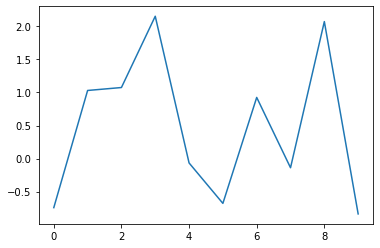

In [211]:
plt.plot(y)
plt.show()

In [214]:
x = np.random.rand(10)
x.sort()

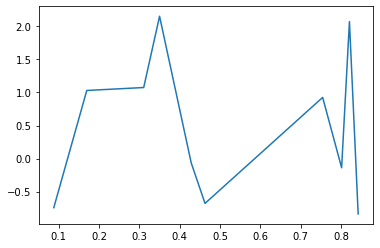

In [215]:
plt.plot(x, y)
plt.show()

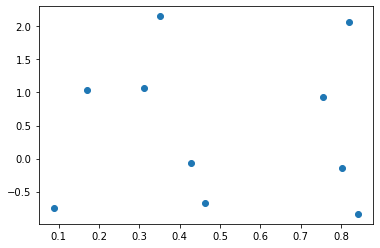

In [216]:
plt.scatter(x, y)
plt.show()

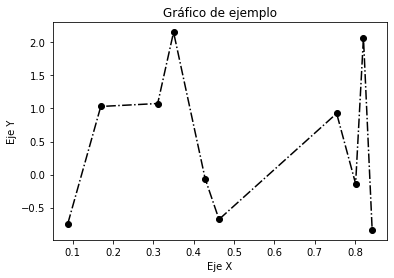

In [228]:
plt.plot(x, y, marker="o", color="k", linestyle="-.")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de ejemplo")
plt.show()

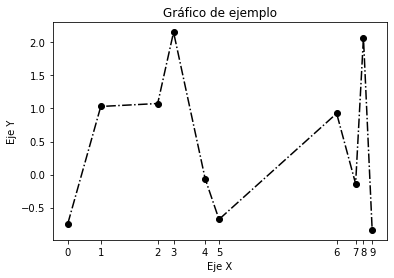

In [233]:
plt.plot(x, y, marker="o", color="k", linestyle="-.")
plt.xticks(ticks=x, labels=range(10))
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de ejemplo")
plt.show()

### Preparamos los datos para graficar

In [243]:
# Volvemos a correr el código de más arriba
potencia_df = pd.read_csv("potencia_instalada_mod.csv", encoding='latin1', sep="|", index_col="Unnamed: 0")
potencia_df.index.name = "indice"
columnas_deseadas = ["periodo", "agente", "agente_descripcion", "fuente_generacion", "potencia_instalada_mw"]
df = potencia_df[columnas_deseadas]
df.potencia_instalada_mw = round(df["potencia_instalada_mw"]).astype(int)
df = df.head(11497)

/tmp/ipykernel_26009/1739540296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.potencia_instalada_mw = round(df["potencia_instalada_mw"]).astype(int)


In [245]:
# Volvemos a generar el dataframe agrupado por periodo/fuente
df_fuente = df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})
df_fuente = df_fuente.reset_index()
df_fuente.head()

,periodo,fuente_generacion,potencia_instalada_mw
0,01/01/2016 0:00,Hidráulica,11106
1,01/01/2016 0:00,Nuclear,1755
2,01/01/2016 0:00,Renovable,213
3,01/01/2016 0:00,Térmica,20554
4,01/01/2017 0:00,Hidráulica,10681


Veamos esta columna de tiempo

In [246]:
df_fuente['periodo']

0      01/01/2016 0:00
1      01/01/2016 0:00
2      01/01/2016 0:00
3      01/01/2016 0:00
4      01/01/2017 0:00
            ...       
147    01/12/2016 0:00
148    01/12/2017 0:00
149    01/12/2017 0:00
150    01/12/2017 0:00
151    01/12/2017 0:00
Name: periodo, Length: 152, dtype: object

Para cambiar de `str` a `datetime` podemos usar nuevamente `pd.to_datetime`. Para especificar formato ver: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [247]:
pd.to_datetime(df_fuente['periodo'], format="%d/%m/%Y %H:%M")

0     2016-01-01
1     2016-01-01
2     2016-01-01
3     2016-01-01
4     2017-01-01
         ...    
147   2016-12-01
148   2017-12-01
149   2017-12-01
150   2017-12-01
151   2017-12-01
Name: periodo, Length: 152, dtype: datetime64[ns]

Para transformar y realizar operaciones sobre datos de tiempo podemos usar la librería datetime.

In [248]:
pd.to_datetime(df_fuente['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m")

0      2016-01
1      2016-01
2      2016-01
3      2016-01
4      2017-01
        ...   
147    2016-12
148    2017-12
149    2017-12
150    2017-12
151    2017-12
Name: periodo, Length: 152, dtype: object

In [249]:
df_fuente['periodo'] = pd.to_datetime(
    df_fuente['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m")

In [250]:
df_fuente.sort_values(by='periodo', ascending=True, inplace=True)

In [144]:
# defino vectores de datos para serie 1
y1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["potencia_instalada_mw"]
x1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["periodo"]
# defino vectores de datos para serie 2
y2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["potencia_instalada_mw"]
x2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["periodo"]

### Matplotlib: ejercicio

Practiquemos Matplotlib! Usando los vectores que acabamos de definir, construyamos un gráfico de linea con dos series: una graficando la evolución de producción energética de fuente renovable y otra de fuente térmica. El gráfico debe contener:
- serie con datos de fuente renovable
- serie con datos de fuente térmica
- los ejes deben tener títulos
- el gráfico debe tener título
- rotar los ticks del eje x para que estén verticales
- leyenda

In [ ]:
# plotear dos lineas, una para fuente Renovable y otro para Térmica
plt.figure(figsize=(12 , 5))
# serie 1

# serie 2 sobre mismos ejes

# Modifiquen nombres de ejes y título

# agregamos leyenda
plt.legend()

#show

### Ejemplo

In [19]:
tick_list = [
    '2015-12',
    '2016-03','2016-06','2016-09','2016-12',
    '2017-03','2017-06','2017-09','2017-12',
    '2018-03','2018-06','2018-09','2018-12'
]

In [ ]:
# creo el grafico
plt.plot(x1,y1, label='Renovable', linestyle='--', linewidth=3) # serie 1
plt.plot(x2, y2, label='Térmica', linestyle='-.', linewidth=3) # serie 2 sobre mismos ejes

# modifico labels
plt.xlabel('Periodo',color='darkgrey')
plt.ylabel('Potencia Instalada (MW)',color='darkgrey')
plt.xticks(tick_list, rotation=45, horizontalalignment="right")

# agregamos linea horizontal con potencia termica promedio
y2_promedio = y2.mean()
plt.axhline(y2_promedio,
    alpha=0.8, color='orange', 
    linestyle=':',linewidth=2)

# escribo sobre el gráfico
plt.annotate('Promedio', ('2018-06', y2_promedio-1400), color='orange')

# apagamos los "spines"
# plt.gca() trae las propiedades del current axes
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

plt.title("Producción Energética Argentina",
          fontdict={
              'size':16,
              'color': 'darkred',
              'weight': 'bold'
          })
# agrego leyenda
plt.legend()
plt.show() #esto es necesario para visualizar

Acá link a un post donde explica comandos simples para mejorar los gráficos:  
https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5